# Segmentação de Dados

A segmentação de dados é uma técnica essencial na análise de dados que permite agrupar elementos com características semelhantes. Assim como a classificação, a segmentação busca estruturar os dados em grupos coesos, mas difere por ser um processo não supervisionado, onde os grupos são definidos automaticamente com base nas similaridades entre os dados.

# Sua Importância

A importância da segmentação está em diversas áreas, como marketing, gestão de clientes e otimização de processos. No contexto empresarial, por exemplo, segmentar clientes permite criar estratégias personalizadas para diferentes perfis de consumidores, melhorando a experiência do usuário e aumentando a eficiência das campanhas.


# Principais características

Entre as principais características da segmentação de dados, destacam-se:

* Agrupamento baseado em similaridade: Os dados são organizados conforme padrões identificados

* Processo não supervisionado: Diferente da classificação, onde há rótulos pré-definidos, a segmentação descobre padrões sem conhecimento prévio

* Facilidade de vizualização e interpretação: Os clusters resultantes podem ser analisados para extrair insights valiosos

# Exemplo Prático

Neste projeto, criaremos um dataset sintético de clientes e utilizaremos o algoritmo K-Means, um dos mais populares para segmentação. Ele distribui os dados em clusters baseados na minimização da distância entre os pontos de cada grupo. Nosso objetivo é segmentar clientes fictícios de acordo com idade e nível de gastos, possibilitando uma análise mais detalhada do comportamento dos grupos identificados.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs

In [14]:
clientes, _ = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)
clientes = pd.DataFrame(clientes, columns=['Idade', 'Gastos'])

In [15]:
scaler = StandardScaler()
clientes_scaled = scaler.fit_transform(clientes)

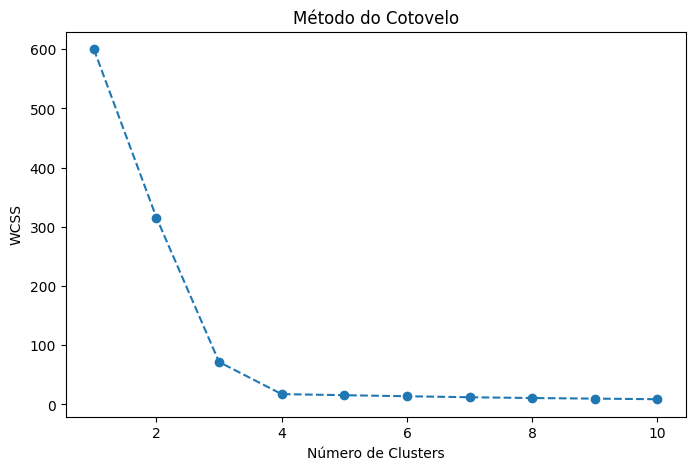

In [17]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(clientes_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.title('Método do Cotovelo')
plt.show()

In [18]:
kmeans_clientes = KMeans(n_clusters=4, random_state=42, n_init=10)
clientes['Cluster'] = kmeans_clientes.fit_predict(clientes_scaled)

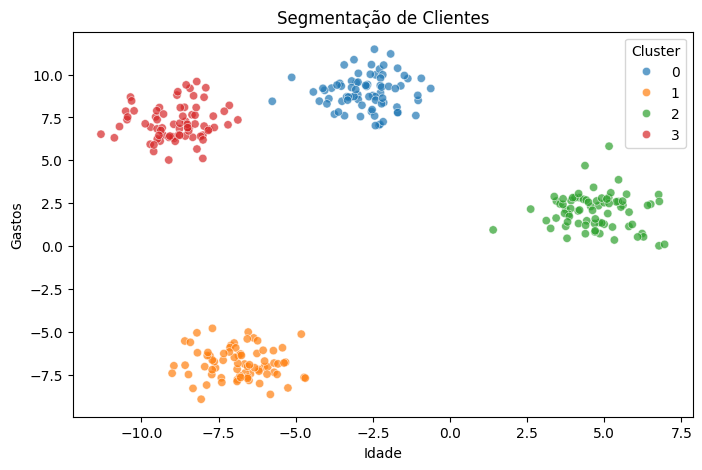

In [19]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x=clientes['Idade'],
    y=clientes['Gastos'],
    hue=clientes['Cluster'],
    palette='tab10',
    alpha=0.7
)
plt.xlabel('Idade')
plt.ylabel('Gastos')
plt.title('Segmentação de Clientes')
plt.legend(title='Cluster')
plt.show()

In [20]:
cluster_summary = clientes.groupby('Cluster').agg({'Idade': ['mean', 'std', 'min', 'max'], 'Gastos': ['mean', 'std', 'min', 'max']})
print(cluster_summary)

            Idade                                   Gastos            \
             mean       std        min       max      mean       std   
Cluster                                                                
0       -2.709811  0.947447  -5.759447 -0.623012  8.971433  0.978970   
1       -6.832352  1.012282  -9.003523 -4.689824 -6.830457  0.898325   
2        4.718205  1.040241   1.398611  6.954537  2.041797  1.013849   
3       -8.873572  0.918842 -11.309972 -6.873603  7.174583  0.995842   

                              
              min        max  
Cluster                       
0        7.026717  11.477528  
1       -8.919342  -4.787722  
2        0.021082   5.825901  
3        5.021602   9.594216  


<ipython-input-21-b69275bc889e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=clientes['Cluster'], palette='tab10')


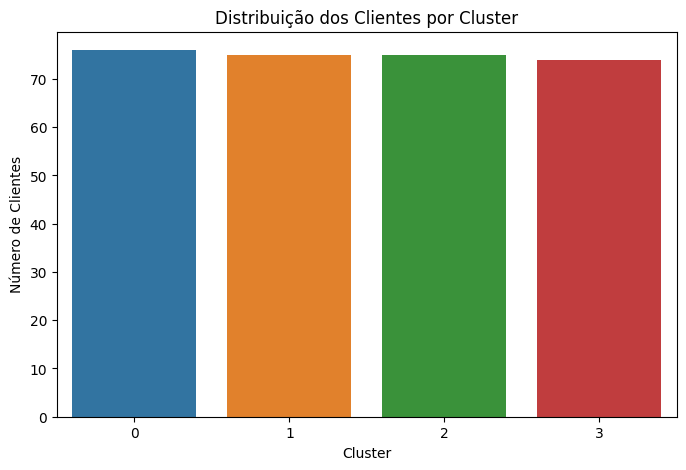

In [21]:
plt.figure(figsize=(8, 5))
sns.countplot(x=clientes['Cluster'], palette='tab10')
plt.xlabel('Cluster')
plt.ylabel('Número de Clientes')
plt.title('Distribuição dos Clientes por Cluster')
plt.show()

<ipython-input-24-1ac6b7d4caeb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=clientes['Cluster'], y=clientes['Idade'], palette='tab10', ax=axes[0])
<ipython-input-24-1ac6b7d4caeb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=clientes['Cluster'], y=clientes['Gastos'], palette='tab10', ax=axes[1])


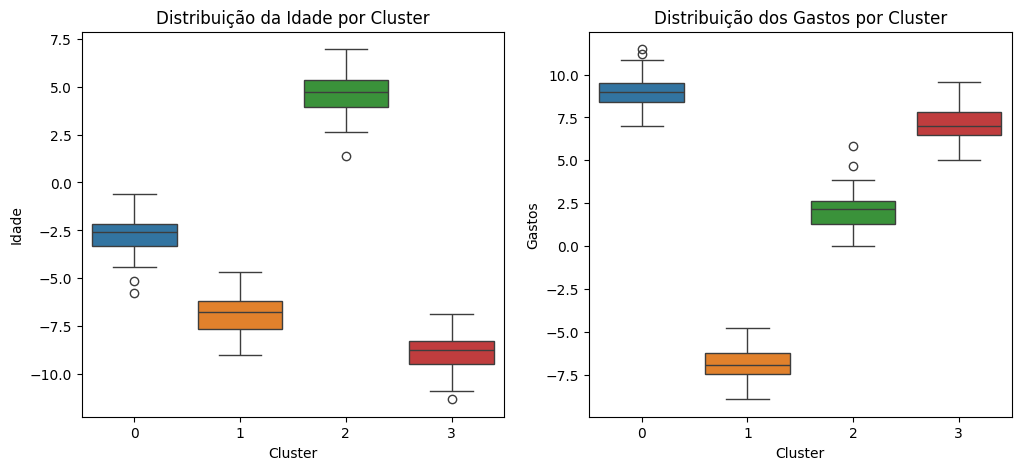

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(x=clientes['Cluster'], y=clientes['Idade'], palette='tab10', ax=axes[0])
axes[0].set_title('Distribuição da Idade por Cluster')
sns.boxplot(x=clientes['Cluster'], y=clientes['Gastos'], palette='tab10', ax=axes[1])
axes[1].set_title('Distribuição dos Gastos por Cluster')
plt.show()

# Conclusão

Através da segmentação de clientes utilizando o algoritmo K-Means, conseguimos agrupar diferentes perfis de consumidores com base na idade e nos gastos. Os resultados mostram que os clusters identificados possuem características distintas, o que pode ser extremamente útil para a personalização de estratégias empresariais, como campanhas de marketing direcionadas e melhoria da experiência do cliente. A análise estatística revelou informações relevantes sobre a distribuição dos clientes em cada cluster, permitindo entender quais grupos possuem maior ou menor poder de compra. Além disso, a visualização dos dados possibilitou uma interpretação clara da segmentação, tornando a análise mais intuitiva e eficiente.

Essa abordagem de segmentação pode ser expandida com a inclusão de novas variáveis, como localização, frequência de compra ou comportamento online, tornando os insights ainda mais robustos e acionáveis. O uso de técnicas de clusterização, como o K-Means, demonstra ser uma ferramenta poderosa para extrair valor dos dados e facilitar a tomada de decisões estratégicas.